In [2]:
!pip install cdsapi


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': ['2m_temperature'],
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': [
            '00:00', '06:00', '12:00', '18:00'
        ],
        'format': 'netcdf',
    },
    'era5_20230101.nc'
)


2025-11-15 12:46:11,604 INFO Request ID is cffad913-32b6-4997-9e48-faaa8319d92f
2025-11-15 12:46:11,876 INFO status has been updated to accepted
2025-11-15 12:46:21,222 INFO status has been updated to running
2025-11-15 12:46:26,599 INFO status has been updated to successful


5c12c9bf5d96cd8554fdb44b4fdf6972.nc:   0%|          | 0.00/5.71M [00:00<?, ?B/s]

'era5_20230101.nc'

In [2]:
!pip install cdsapi xarray netCDF4 matplotlib cartopy


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
   ----------------------- ---------------- 4.2/7.1 MB 20.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.1 MB 20.9 MB/s eta 0:00:01
   ------------------------------ --------- 5.5/7.1 MB 9.3 MB/s eta 0:00:01
   ----------------------------------- ---- 6.3/7.1 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 7.1/7.1 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 4.6 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.0 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.0 MB 3.0 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 3.4 MB/s eta 0:00:03
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import cdsapi

try:
    c = cdsapi.Client()
    print("CDS API is working!")
except Exception as e:
    print("CDS API ERROR:", e)


CDS API is working!


In [6]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': ['2m_temperature'],
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': ['00:00','06:00','12:00','18:00'],
        'format': 'netcdf',
    },
    'era5_20230101.nc'
)

print("Download complete: era5_20230101.nc")


2025-11-15 12:50:18,478 INFO Request ID is a6c22a6f-8c1f-4a25-87e8-65cdc0a1e096
2025-11-15 12:50:19,125 INFO status has been updated to accepted
2025-11-15 12:50:28,516 INFO status has been updated to running
2025-11-15 12:50:33,914 INFO status has been updated to successful


5c12c9bf5d96cd8554fdb44b4fdf6972.nc:   0%|          | 0.00/5.71M [00:00<?, ?B/s]

Download complete: era5_20230101.nc


In [7]:
import xarray as xr

ds = xr.open_dataset("era5_20230101.nc")
ds


<xarray.Dataset>
Dimensions:     (valid_time: 4, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-01-01T18:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) object ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-15T07:16 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
import matplotlib.pyplot as plt


lat = 28.6
lon = 77.2

point = ds.sel(latitude=lat, longitude=lon, method="nearest")

plt.figure(figsize=(10,4))
plt.plot(point.time, point.t2m - 273.15)  # Convert K → °C
plt.title("ERA5 2m Temperature (°C)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


AttributeError: 'Dataset' object has no attribute 'time'

<Figure size 1000x400 with 0 Axes>

In [9]:
print(ds)

<xarray.Dataset>
Dimensions:     (valid_time: 4, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-01-01T18:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) object ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-15T07:16 GRIB to CDM+CF via cfgrib-0.9.1...


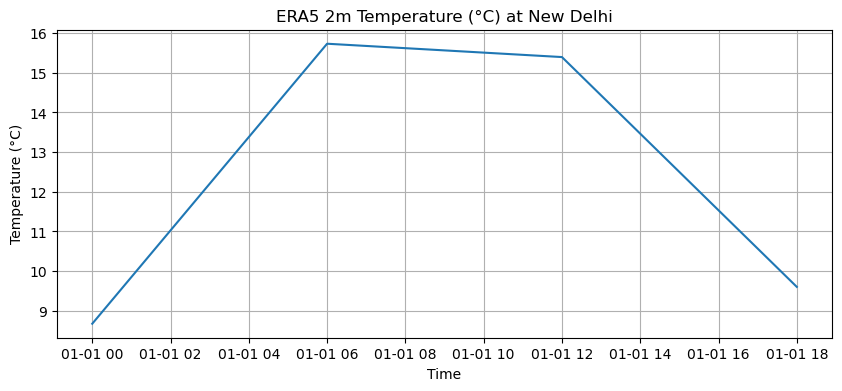

In [10]:
import matplotlib.pyplot as plt

# Choose a location (example: New Delhi)
lat = 28.6
lon = 77.2

# Select nearest grid point
point = ds.sel(latitude=lat, longitude=lon, method="nearest")

plt.figure(figsize=(10,4))

# Use 'valid_time' instead of 'time'
plt.plot(point.valid_time, point['t2m'] - 273.15)  # Kelvin → °C

plt.title("ERA5 2m Temperature (°C) at New Delhi")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


In [11]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '2m_temperature',
            '2m_dewpoint_temperature',
            '10m_u_component_of_wind',
            '10m_v_component_of_wind',
            'surface_pressure',
            'total_precipitation'
        ],
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': ['00:00','06:00','12:00','18:00'],
        'format': 'netcdf',
    },
    'era5_multivars_20230101.nc'
)


2025-11-15 12:59:18,865 INFO Request ID is f911a753-a4b5-427d-85ff-5977c81bf7fb
2025-11-15 12:59:19,205 INFO status has been updated to accepted
2025-11-15 12:59:34,054 INFO status has been updated to running
2025-11-15 12:59:41,999 INFO status has been updated to successful


6569bc8dada0490dadc19e663d9ff7c9.zip:   0%|          | 0.00/35.9M [00:00<?, ?B/s]

Recovering from connection error [('Connection broken: IncompleteRead(10469376 bytes read, 27183982 more expected)', IncompleteRead(10469376 bytes read, 27183982 more expected))], attempt 1 of 500
Retrying in 120 seconds


6569bc8dada0490dadc19e663d9ff7c9.zip:  25%|##5       | 9.00M/35.9M [00:00<?, ?B/s]

'era5_multivars_20230101.nc'

In [13]:
import xarray as xr

ds = xr.open_dataset("era5_multivars_20230101.nc")
print(ds)


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [14]:
import os
os.listdir()


['.ipynb_checkpoints',
 'era5_20230101.nc',
 'era5_multivars_20230101.nc',
 'Untitled.ipynb',
 'untitled.txt',
 'Untitled1.ipynb']

In [15]:
import os
print(os.path.getsize("era5_multivars_20230101.nc"))


37653358


In [17]:
import xarray as xr

ds = xr.open_dataset("era5_multivars_20230101.nc", engine="cfgrib")
ds


ValueError: unrecognized engine cfgrib must be one of: ['netcdf4', 'scipy', 'store']

In [3]:
import xarray as xr

ds = xr.open_dataset("era5_multivars_20230101.nc", engine="cfgrib")
ds


ValueError: unrecognized engine cfgrib must be one of: ['netcdf4', 'scipy', 'store']

In [3]:
import sys
print(sys.executable)


C:\ProgramData\anaconda3\python.exe


In [1]:
import cfgrib
import xarray as xr


In [2]:
import xarray as xr

ds = xr.open_dataset(
    "era5_multivars_20230101.nc",
    engine="cfgrib"
)

ds


skipping corrupted Message
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\cfgrib\messages.py", line 274, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\cfgrib\messages.py", line 341, in message_from_file
    return Message.from_file(file, offset, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\cfgrib\messages.py", line 97, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\gribapi\gribapi.py", line 409, in grib_new_from_file
    GRIB_CHECK(err)
  File "C:\ProgramData\anaconda3\Lib\site-packages\gribapi\gribapi.py", line 226, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "C:\ProgramData\anaconda3\Lib\site-pack

EOFError: No valid message found: 'era5_multivars_20230101.nc'

In [ ]:
print(ds.variables)


In [5]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',   # IMPORTANT!!!
        'variable': [
            '2m_temperature',
            '10m_u_component_of_wind',
            '10m_v_component_of_wind',
            'mean_sea_level_pressure',
            'total_precipitation'
        ],
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': [
            '00:00', '06:00', '12:00', '18:00', 
        ],
    },
    'era5_multivars_20230101_new.nc'
)


2025-11-15 14:20:57,282 INFO Request ID is 5a93faff-8fdf-40a8-9c26-3501b0666709
2025-11-15 14:20:57,521 INFO status has been updated to accepted
2025-11-15 14:21:11,908 INFO status has been updated to running
2025-11-15 14:21:19,739 INFO status has been updated to successful


d849c2b0c828e89ca079377e52a186bb.zip:   0%|          | 0.00/29.7M [00:00<?, ?B/s]

Recovering from connection error [('Connection broken: IncompleteRead(11272192 bytes read, 19906402 more expected)', IncompleteRead(11272192 bytes read, 19906402 more expected))], attempt 1 of 500
Retrying in 120 seconds


d849c2b0c828e89ca079377e52a186bb.zip:  34%|###3      | 10.0M/29.7M [00:00<?, ?B/s]

'era5_multivars_20230101_new.nc'

In [6]:
import xarray as xr

ds = xr.open_dataset("era5_multivars_20230101_new.nc")
ds


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'cfgrib']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [7]:
import os
os.path.getsize("era5_multivars_20230101_new.nc")


31178594

In [8]:
import xarray as xr

ds = xr.open_dataset("era5_multivars_20230101_new.nc")
ds


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'cfgrib']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [9]:
with open("era5_multivars_20230101_new.nc", "rb") as f:
    print(f.read(4))


b'PK\x03\x04'


In [10]:
import zipfile

with zipfile.ZipFile("era5_multivars_20230101_new.nc", "r") as z:
    print(z.namelist())


['data_stream-oper_stepType-instant.nc', 'data_stream-oper_stepType-accum.nc']


In [11]:
import zipfile

with zipfile.ZipFile("era5_multivars_20230101_new.nc", "r") as z:
    z.extractall("era5_extracted")


In [12]:
import os
os.listdir("era5_extracted")


['data_stream-oper_stepType-accum.nc', 'data_stream-oper_stepType-instant.nc']

In [13]:
import xarray as xr
ds = xr.open_dataset("era5_extracted/download.nc")
ds


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\acer\\Ml_Project\\era5_extracted\\download.nc'

In [14]:
import xarray as xr

ds1 = xr.open_dataset("era5_extracted/data_stream-oper_stepType-accum.nc")
ds2 = xr.open_dataset("era5_extracted/data_stream-oper_stepType-instant.nc")

ds = xr.merge([ds1, ds2])
ds


<xarray.Dataset>
Dimensions:     (valid_time: 4, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-01-01T18:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) object '0001' '0001' '0001' '0001'
Data variables:
    tp          (valid_time, latitude, longitude) float32 ...
    t2m         (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-15T08:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [15]:
list(ds.data_vars)


['tp', 't2m', 'u10', 'v10', 'msl']

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [17]:
inst = xr.open_dataset("era5_extracted/data_stream-oper_stepType-instant.nc")
acc  = xr.open_dataset("era5_extracted/data_stream-oper_stepType-accum.nc")


In [18]:
ds = xr.merge([inst, acc])
ds


<xarray.Dataset>
Dimensions:     (valid_time: 4, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-01-01T18:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) object '0001' '0001' '0001' '0001'
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
    u10         (valid_time, latitude, longitude) float32 ...
    v10         (valid_time, latitude, longitude) float32 ...
    msl         (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-15T08:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [19]:
ds = ds.rename({
    't2m': 'temperature',
    'u10': 'u_wind',
    'v10': 'v_wind',
    'msl': 'mslp',
    'tp':  'precip'
})


In [20]:
ds["temperature_c"] = ds["temperature"] - 273.15


In [21]:
ds["precip_mm"] = ds["precip"] * 1000


In [22]:
ds["wind_speed"] = np.sqrt(ds["u_wind"]**2 + ds["v_wind"]**2)


In [23]:
lat = 28.6
lon = 77.2

point = ds.sel(latitude=lat, longitude=lon, method="nearest")
point


<xarray.Dataset>
Dimensions:        (valid_time: 4)
Coordinates:
    number         int64 0
  * valid_time     (valid_time) datetime64[ns] 2023-01-01 ... 2023-01-01T18:0...
    latitude       float64 28.5
    longitude      float64 77.25
    expver         (valid_time) object '0001' '0001' '0001' '0001'
Data variables:
    temperature    (valid_time) float32 281.8 288.9 288.5 282.8
    u_wind         (valid_time) float32 1.503 1.038 0.07405 -1.763
    v_wind         (valid_time) float32 -0.5288 -0.1788 -1.232 0.3499
    mslp           (valid_time) float32 ...
    precip         (valid_time) float32 0.0 0.0 0.0 0.0
    temperature_c  (valid_time) float32 8.675 15.73 15.4 9.603
    precip_mm      (valid_time) float32 0.0 0.0 0.0 0.0
    wind_speed     (valid_time) float32 1.593 1.053 1.234 1.797
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-15T08:48 GRIB to CDM+CF via cfgrib-0.9.1...

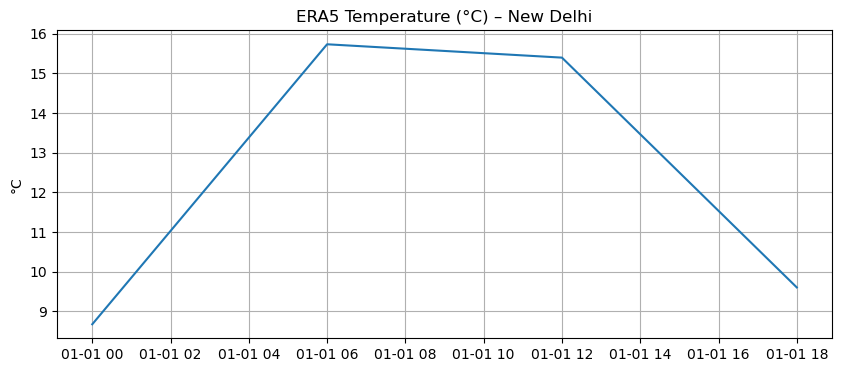

In [26]:
plt.figure(figsize=(10,4))
plt.plot(point.valid_time
, point.temperature_c)
plt.grid(True)
plt.title("ERA5 Temperature (°C) – New Delhi")
plt.ylabel("°C")
plt.show()


In [25]:
plt.figure(figsize=(10,5))
ds.wind_speed.isel(time=0).plot()
plt.title("ERA5 Wind Speed (m/s) — 00 UTC")
plt.show()


ValueError: Dimensions {'time'} do not exist. Expected one or more of ('valid_time', 'latitude', 'longitude')

<Figure size 1000x500 with 0 Axes>

In [28]:
import numpy as np

ds["wind_speed"] = np.sqrt(ds.u_wind**2 + ds.v_wind**2)


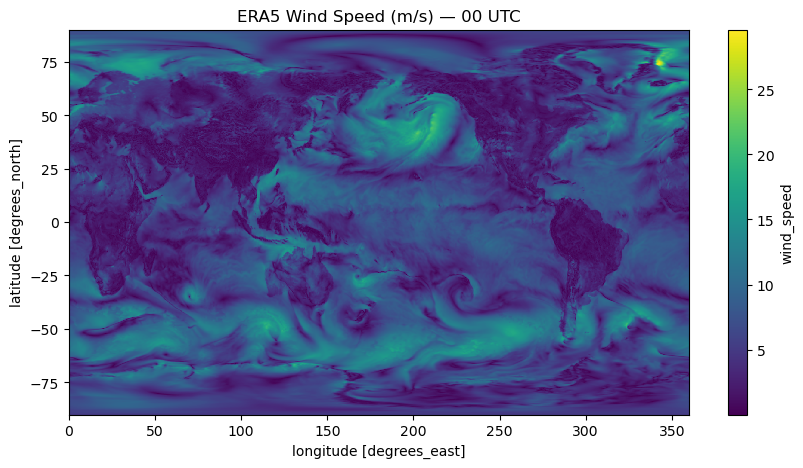

In [29]:
plt.figure(figsize=(10,5))
ds.wind_speed.isel(valid_time=0).plot()
plt.title("ERA5 Wind Speed (m/s) — 00 UTC")
plt.show()


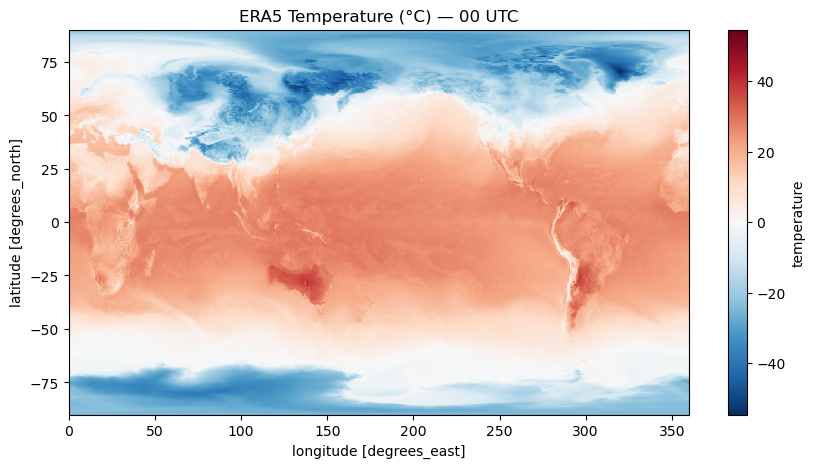

In [30]:
plt.figure(figsize=(10,5))
(ds.temperature - 273.15).isel(valid_time=0).plot()
plt.title("ERA5 Temperature (°C) — 00 UTC")
plt.show()


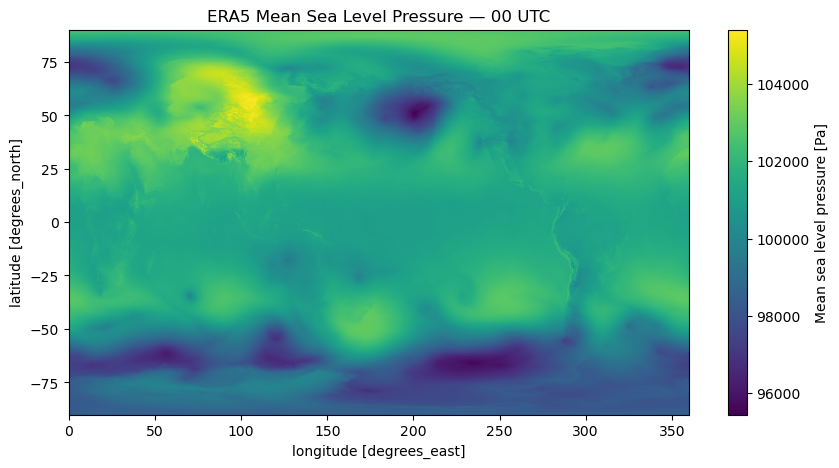

In [31]:
plt.figure(figsize=(10,5))
ds.mslp.isel(valid_time=0).plot()
plt.title("ERA5 Mean Sea Level Pressure — 00 UTC")
plt.show()


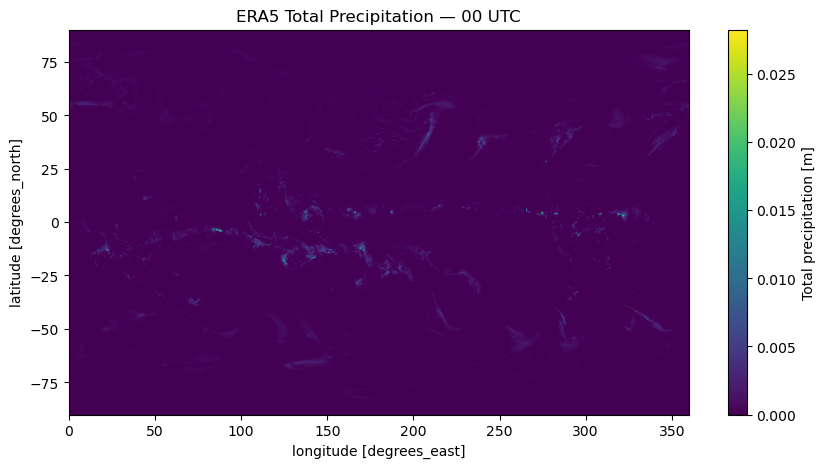

In [32]:
plt.figure(figsize=(10,5))
ds.precip.isel(valid_time=0).plot()
plt.title("ERA5 Total Precipitation — 00 UTC")
plt.show()


In [33]:
import pandas as pd
import numpy as np

# ---- 10 City Coordinates ----
cities = {
    "New_Delhi":   (28.61, 77.21),
    "Mumbai":      (19.07, 72.88),
    "Kolkata":     (22.57, 88.36),
    "Chennai":     (13.08, 80.27),
    "Bengaluru":   (12.97, 77.59),
    "Hyderabad":   (17.39, 78.49),
    "Ahmedabad":   (23.02, 72.57),
    "Pune":        (18.52, 73.85),
    "Jaipur":      (26.91, 75.79),
    "Lucknow":     (26.85, 80.95)
}

# Store all city time-series here
city_ts = {}

for city, (lat, lon) in cities.items():
    # Find nearest ERA5 grid point
    point = ds.sel(latitude=lat, longitude=lon, method="nearest")

    # Convert to DataFrame
    df = point.to_dataframe().reset_index()

    # Add city name
    df["city"] = city

    city_ts[city] = df

    print(f"Extracted: {city}")


Extracted: New_Delhi
Extracted: Mumbai
Extracted: Kolkata
Extracted: Chennai
Extracted: Bengaluru
Extracted: Hyderabad
Extracted: Ahmedabad
Extracted: Pune
Extracted: Jaipur
Extracted: Lucknow


In [34]:
full_df = pd.concat(city_ts.values(), ignore_index=True)
print(full_df.head())


           valid_time  number  latitude  longitude expver  temperature  \
0 2023-01-01 00:00:00       0      28.5      77.25   0001   281.824554   
1 2023-01-01 06:00:00       0      28.5      77.25   0001   288.881561   
2 2023-01-01 12:00:00       0      28.5      77.25   0001   288.545227   
3 2023-01-01 18:00:00       0      28.5      77.25   0001   282.753326   
4 2023-01-01 00:00:00       0      19.0      73.00   0001   292.635101   

     u_wind    v_wind         mslp  precip  temperature_c  precip_mm  \
0  1.502747 -0.528763  101991.4375     0.0       8.674561        0.0   
1  1.037872 -0.178848  102249.6875     0.0      15.731567        0.0   
2  0.074051 -1.231689  101946.4375     0.0      15.395233        0.0   
3 -1.762589  0.349930  102124.0000     0.0       9.603333        0.0   
4 -0.415222 -2.683060  101572.4375     0.0      19.485107        0.0   

   wind_speed       city  
0    1.593059  New_Delhi  
1    1.053169  New_Delhi  
2    1.233913  New_Delhi  
3    1.796989 

In [35]:
import numpy as np

# Wind speed
full_df["wind_speed"] = np.sqrt(full_df["u_wind"]**2 + full_df["v_wind"]**2)

# Wind direction (degrees from north)
full_df["wind_dir"] = (np.degrees(np.arctan2(full_df["u_wind"], full_df["v_wind"])) + 360) % 360


In [36]:
full_df["temp_c"] = full_df["temperature"] - 273.15


In [37]:
full_df["hour"] = full_df["time"].dt.hour
full_df["day"] = full_df["time"].dt.day
full_df["month"] = full_df["time"].dt.month
full_df["dayofyear"] = full_df["time"].dt.dayofyear

# Cyclic encoding (VERY important for Neural Networks)
full_df["hour_sin"] = np.sin(2 * np.pi * full_df["hour"] / 24)
full_df["hour_cos"] = np.cos(2 * np.pi * full_df["hour"] / 24)

full_df["month_sin"] = np.sin(2 * np.pi * full_df["month"] / 12)
full_df["month_cos"] = np.cos(2 * np.pi * full_df["month"] / 12)


KeyError: 'time'

In [38]:
full_df.columns



Index(['valid_time', 'number', 'latitude', 'longitude', 'expver',
       'temperature', 'u_wind', 'v_wind', 'mslp', 'precip', 'temperature_c',
       'precip_mm', 'wind_speed', 'city', 'wind_dir', 'temp_c'],
      dtype='object')

In [39]:
full_df = full_df.rename(columns={"valid_time": "time"})


In [40]:
full_df["time"] = pd.to_datetime(full_df["time"])


In [42]:
full_df["hour"] = full_df["time"].dt.hour
full_df["day"] = full_df["time"].dt.day
full_df["month"] = full_df["time"].dt.month
full_df["dayofyear"] = full_df["time"].dt.dayofyear

# Cyclic encoding
full_df["hour_sin"] = np.sin(2 * np.pi * full_df["hour"] / 24)
full_df["hour_cos"] = np.cos(2 * np.pi * full_df["hour"] / 24)

full_df["month_sin"] = np.sin(2 * np.pi * full_df["month"] / 12)
full_df["month_cos"] = np.cos(2 * np.pi * full_df["month"] / 12)


In [43]:
# Select the important variables for ML
features = [
    "temperature_c",
    "wind_speed",
    "precip_mm",
    "mslp",
    "u_wind",
    "v_wind",
    "hour", "day", "month", "dayofyear",
    "hour_sin", "hour_cos",
    "month_sin", "month_cos"
]

# Include city as categorical feature
full_df["city"] = full_df["city"].astype("category")
full_df["city_code"] = full_df["city"].cat.codes

# Final feature list including city
features = features + ["city_code"]

# Create the ML dataset
ml_df = full_df[["time", "city"] + features]

ml_df.head()


,time,city,temperature_c,wind_speed,precip_mm,mslp,u_wind,v_wind,hour,day,month,dayofyear,hour_sin,hour_cos,month_sin,month_cos,city_code
0,2023-01-01 00:00:00,New_Delhi,8.674561,1.593059,0.0,101991.4375,1.502747,-0.528763,0,1,1,1,0.000000e+00,1.000000e+00,0.5,0.866025,8
1,2023-01-01 06:00:00,New_Delhi,15.731567,1.053169,0.0,102249.6875,1.037872,-0.178848,6,1,1,1,1.000000e+00,6.123234e-17,0.5,0.866025,8
2,2023-01-01 12:00:00,New_Delhi,15.395233,1.233913,0.0,101946.4375,0.074051,-1.231689,12,1,1,1,1.224647e-16,-1.000000e+00,0.5,0.866025,8
3,2023-01-01 18:00:00,New_Delhi,9.603333,1.796989,0.0,102124.0000,-1.762589,0.349930,18,1,1,1,-1.000000e+00,-1.836970e-16,0.5,0.866025,8
4,2023-01-01 00:00:00,Mumbai,19.485107,2.714999,0.0,101572.4375,-0.415222,-2.683060,0,1,1,1,0.000000e+00,1.000000e+00,0.5,0.866025,7


In [44]:
ml_df.to_csv("era5_ml_dataset_10_cities.csv", index=False)


In [45]:
# Sort by time to maintain chronological order
full_df = full_df.sort_values("time")

# Train = first 80%, Test = last 20%
train_size = int(len(full_df) * 0.8)

train_df = full_df.iloc[:train_size]
test_df  = full_df.iloc[train_size:]

print(len(train_df), "training rows")
print(len(test_df),  "testing rows")


32 training rows
8 testing rows


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features to use (keep it simple for small dataset)
feature_cols = [
    "wind_speed", "precip_mm", "mslp",
    "hour_sin", "hour_cos",
    "month_sin", "month_cos",
    "city_code"
]

X_train = train_df[feature_cols]
y_train = train_df["temp_c"]

X_test = test_df[feature_cols]
y_test = test_df["temp_c"]

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=50,  # small number for tiny dataset
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} °C")
print(f"MAE: {mae:.2f} °C")
print(f"R² Score: {r2:.2f}")


RMSE: 2.59 °C
MAE: 2.03 °C
R² Score: 0.70


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


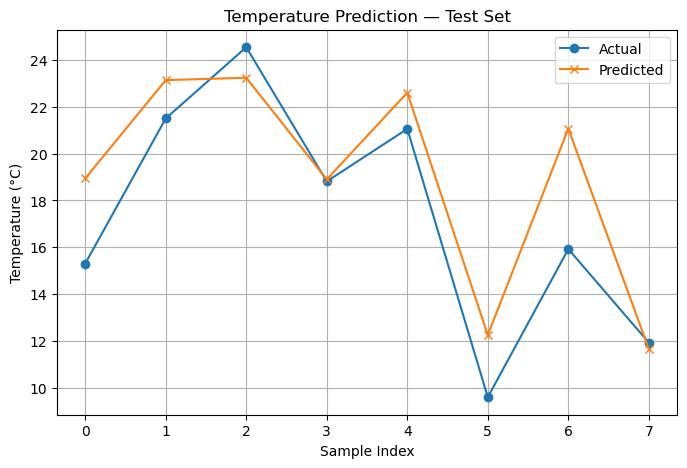

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Temperature Prediction — Test Set")
plt.xlabel("Sample Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


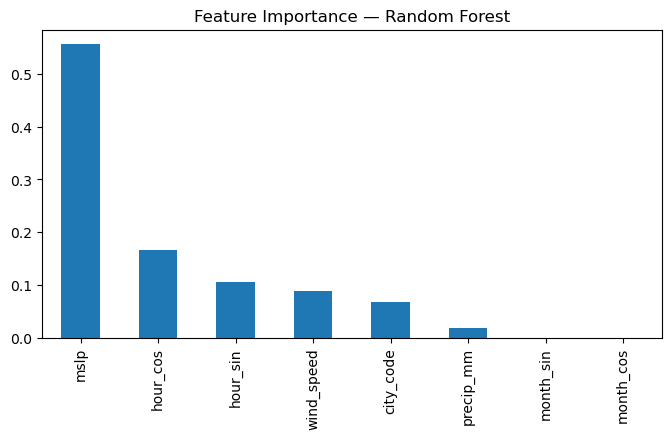

In [49]:
import pandas as pd

feat_importances = pd.Series(rf_model.feature_importances_, index=feature_cols)
feat_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8,4))
plt.title("Feature Importance — Random Forest")
plt.show()


In [50]:
import joblib

joblib.dump(rf_model, "rf_demo_model.pkl")


['rf_demo_model.pkl']

In [51]:
loaded_model = joblib.load("rf_demo_model.pkl")
